Epoch 1/5
12/12 [==============================] - 1s 37ms/step - loss: 2.5278 - acc: 0.1194 - val_loss: 2.0669 - val_acc: 0.4550
Epoch 2/5
12/12 [==============================] - 0s 16ms/step - loss: 2.1659 - acc: 0.2241 - val_loss: 1.8652 - val_acc: 0.5970
Epoch 3/5
12/12 [==============================] - 0s 17ms/step - loss: 1.9450 - acc: 0.3437 - val_loss: 1.6868 - val_acc: 0.6590
Epoch 4/5
12/12 [==============================] - 0s 19ms/step - loss: 1.7418 - acc: 0.4406 - val_loss: 1.5177 - val_acc: 0.7250
Epoch 5/5
12/12 [==============================] - 0s 23ms/step - loss: 1.5857 - acc: 0.5050 - val_loss: 1.3719 - val_acc: 0.7390


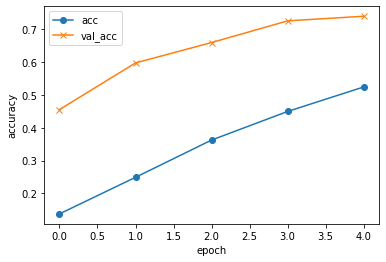

In [8]:
# 딥러닝 체험
# epoch 수가 높아짐에 따라 훈련 데이터의 정확도 acc와 테스트 데이터의 정확도 val_acc가 올라가는 모습 확인하기
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import optimizers
from keras.utils.np_utils import to_categorical
%matplotlib inline

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim = 784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["acc"])

#epochs 수를 5로 하기
history = model.fit(X_train, y_train, batch_size=500, epochs=5, verbose=1, validation_data=(X_test, y_test))

#acc와 val_acc 플롯
plt.plot(history.history["acc"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_acc"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()